<a href="https://colab.research.google.com/github/iamatul1214/NLP/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Assuming the dataset is downloaded already
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import os


In [2]:
ROOT = "/content/drive/MyDrive/Twitter_sentiment_Analysis"
os.chdir(ROOT)


In [3]:
!pwd

/content/drive/MyDrive/Twitter_sentiment_Analysis


In [4]:
## load the data
data_loc = "Twitter_dataset.csv"
encoding_type="ISO-8859-1"
data = pd.read_csv(data_loc, encoding=encoding_type)
data.head(10)

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
5,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
6,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
7,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
8,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?
9,0,1467812416,Mon Apr 06 22:20:16 PDT 2009,NO_QUERY,erinx3leannexo,spring break in plain city... it's snowing


In [5]:
data.columns

Index(['0', '1467810369', 'Mon Apr 06 22:19:45 PDT 2009', 'NO_QUERY',
       '_TheSpecialOne_',
       '@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D'],
      dtype='object')

In [7]:
## reading again after adding the column names
columns=['target','Ids','Date','flag','User','tweet_text']
data = pd.read_csv(data_loc, names=columns, encoding=encoding_type)
data.head()

,target,Ids,Date,flag,User,tweet_text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [8]:
## Let's check the shape of data
data.shape

(1600000, 6)

In [9]:
## If data column size is less than 6 we can reject it if needed since, here we only need last column so we can ignore this condition check
data.columns.size

6

In [10]:
 data.dtypes

target         int64
Ids            int64
Date          object
flag          object
User          object
tweet_text    object
dtype: object

In [11]:
## checking for null values
np.sum(data.isnull())

target        0
Ids           0
Date          0
flag          0
User          0
tweet_text    0
dtype: int64

In [12]:
## for entire columns
np.sum(data.isnull().any(axis=1))

0

In [13]:
print('Count of columns in the data is:  ', len(data.columns))
print('Count of rows in the data is:  ', len(data))

Count of columns in the data is:   6
Count of rows in the data is:   1600000


In [14]:
data['target'].unique()

array([0, 4])

In [15]:
## checking the number of target 
data['target'].nunique()

2

[Text(0, 0, 'Negative'), Text(0, 0, 'Positive')]

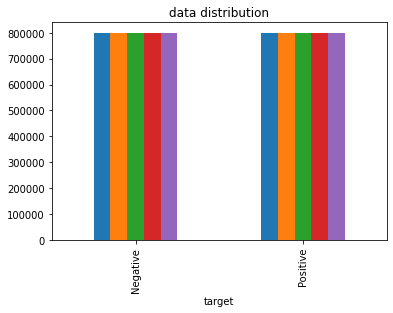

In [16]:
## let's plot the distribution for the dataset
graph = data.groupby('target').count().plot(kind='bar', title="data distribution", legend=False)
graph.set_xticklabels(['Negative','Positive'])

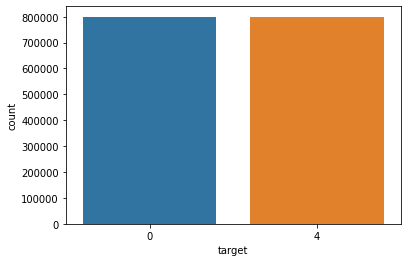

In [17]:
## plotting using seaborn
sns.countplot(x='target', data=data)

In [18]:
data['target']

0          0
1          0
2          0
3          0
4          0
          ..
1599995    4
1599996    4
1599997    4
1599998    4
1599999    4
Name: target, Length: 1600000, dtype: int64

In [19]:
data.loc[data.target==0].count()['target']   ## checking the count of negative

800000

In [20]:
data.loc[data.target==4].count()['target']   ## checking the count of positve

800000

In [21]:
data.target.size

1600000

In [22]:
def check_data_distribution(dataframe):
  ## this function will check if data distribution is anywhere less than 60:40 then reject the pipeline
  negative = data.loc[data.target==0].count()['target']
  positive = data.loc[data.target==4].count()['target'] 
  total_size = data.target.size

  ratio = (positive/total_size) * 100

  if ratio >60 or ratio <40:
    print("The ratio of data distribution is less than 60:40 hence, failing the pipeline")
  else:
    print("The ratio of the data distribution is under 60:40 range hence, passing the pipeline for next stage")
  


In [23]:
check_data_distribution(data)

The ratio of the data distribution is under 60:40 range hence, passing the pipeline for next stage


## Data preprocessing starts here--

In [24]:
## creating a new dataframe with just tewwt_text and target columns
filtered_data = data[['target','tweet_text']]
filtered_data.head()

,target,tweet_text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [25]:
## replacing target value 4 by 1 for ease of understanding
filtered_data['target'] = filtered_data['target'].replace(4,1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


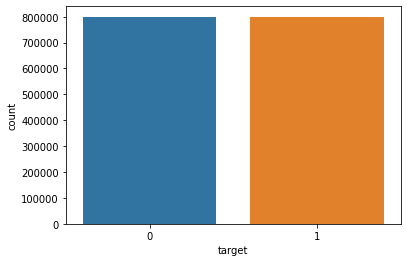

In [26]:
sns.countplot(x='target', data=filtered_data)

In [27]:
## changing the int datatype of target column into float 
# filtered_data['target'] = filtered_data['target'].astype(float)
# filtered_data.head(5)

In [28]:
filtered_data.dtypes

target         int64
tweet_text    object
dtype: object

In [ ]:
def remove_stop_words(data,stop_words):
  pass

In [ ]:
def remove_punctuations(data):
  pass

In [ ]:
def remove_special_characters(data):
  pass


In [ ]:
def remove_urls(data):
  pass

In [29]:
## separating input feature and output label
X = filtered_data.tweet_text
Y= filtered_data.target

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=23, shuffle=True)

In [31]:
x_train.shape, y_train.shape

((1200000,), (1200000,))

In [55]:
## creating train_data, test_data set so that target and tweets can be in together set and I can convert datasets into tensor
train_data, test_data = train_test_split(filtered_data, test_size=0.25,random_state=16)

In [32]:
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

In [33]:
class Config:
  BUFFER_SIZE = 10000
  BATCH_SIZE = 64
  VOCAB_SIZE = 1000
  OUTPUT_DIM = 64
  EPOCHS = 10
  BASE_LOG_DIR = "base_log_dir"
  TRAINED_MODEL_DIR = os.path.join(BASE_LOG_DIR, "models")
  CHECKPOINT_DIR = os.path.join(BASE_LOG_DIR, "ckpt")
  TB_ROOT_LOG_DIR = os.path.join(BASE_LOG_DIR, "tb_log_dir")

In [ ]:
# np_array = filtered_data.to_numpy()
# text_dataset = tf.convert_to_tensor(x_test)
# type(text_dataset)

tensorflow.python.framework.ops.EagerTensor

In [58]:
train_data

,target,tweet_text
87499,0,Spring/Summer cleaning
180625,0,Just ran over my first bird.
462466,0,@pixiexdust I am so sorry.. ... I wish I coul...
665055,0,Tonight's the night. Moo Shu and Dumpling are ...
844730,1,Photo: Christian got owned! http://tumblr.com...
...,...,...
823748,1,@NHLBlackhawks &quot;We Win&quot; lyrics: Gonn...
98939,0,@ThatKevinSmith Those are some sweet looking J...
98885,0,@Kennedia Aww im now sunshine too! I'm okies. ...
919673,1,@nomaditation oo? u?op ?p?sdn ??d?? ss???sn s...


In [34]:
x_train

1107851                       @aethre Yeah! I like cupcakes 
718975     gonna be bored for the rest of the night, caus...
838152     @SueMurphy Thank you for your very kind follow...
723457         @ImWendy nighty night 2 hrs till my bed time 
483840     So i lost it allllll!!!!!! Im so pissed, ugh. ...
                                 ...                        
727071                                  Fuckin got arrested 
1387446        please,let me be myself for a while,dude.... 
795688         @LAKERMAMI oh.em.geeeeee!  that's no bueno!!!
652006          just chugged a mug of tea.  I feel funny... 
893523     @marilynsuttle Thanks Marilyn! I'm now followi...
Name: tweet_text, Length: 1200000, dtype: object

In [35]:
## converting the train test splits into numpy array and flattening them so that they can be passed to our encoder
x_train = np.array([x_train]).flatten()
x_test = np.array([x_test]).flatten()
y_train = np.array([y_train]).flatten()
y_test = np.array([y_test]).flatten()
x_train,x_test,y_train,y_test

(array(['@aethre Yeah! I like cupcakes ',
        'gonna be bored for the rest of the night, cause my brother will be gone. ',
        '@SueMurphy Thank you for your very kind follow Friday and for your lovely tweet re migraine ',
        ..., "@LAKERMAMI oh.em.geeeeee!  that's no bueno!!!",
        'just chugged a mug of tea.  I feel funny... ',
        "@marilynsuttle Thanks Marilyn! I'm now following you and @ShawneTV! "],
       dtype=object), array(['yesterday was a fun day   i love my work.',
        'SWFWheel ???? js ? ExternalInterface ?????????????????? Wonderfl ??????????????????????? ',
        "@julioanta, I COULD OF SWORN IT WAS OTOWN, UGH I SUCK! I'm watching it on youtube. WOW I FAIL ",
        ...,
        'Ooh my smile is looking good Dr. Besler!  Met my new dentist at an ImpactCR event.  The benefits of membership just never end! ',
        '@subtle__sarcasm Not working for me either. ',
        "nicole's with jess erica molly shemo michael josh dylan chris paul and n

In [36]:
x_train.size,y_train.size  ## After numpy().flattening the x_train and y_train they change the shape and maybe this is the reason for model not traininig

(1200000, 1200000)

In [43]:
## Now converting them into the tensors
x_train_dataset = tf.data.Dataset.from_tensor_slices(x_train)
x_test_dataset = tf.data.Dataset.from_tensor_slices(x_test)
y_train_dataset = tf.data.Dataset.from_tensor_slices(y_train)
y_test_dataset = tf.data.Dataset.from_tensor_slices(y_test)
x_train_dataset, x_test_dataset,y_train_dataset, y_test_dataset

(<TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>,
 <TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>,
 <TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>,
 <TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>)

In [45]:
## trying to perform same operation what we did with x_train,y_train,x_test,y_test means flattening the dataset which is along with target
train_dataset = np.array([train_data]).flatten()
test_dataset = np.array([test_data]).flatten()
train_dataset,test_dataset

(array([0, 'Spring/Summer cleaning ', 0, ...,
        "@nomaditation  oo? u?op ?p?sdn ??d?? ss???sn s??? u?????? ???? ? 'p??? o? p??? ?no? ?u?u?n? ?q ?o?p? u? ?o ??o? ???? ?oo? o? ???? o? ?sn?",
        0, 'Ow.  make the pain stop. '], dtype=object), array([1,
        '@maxz2040 yer well its a 6.45 game...but i gotta pik up mesh from the traino b4.  so...yer from 5pm should be fine! ',
        1, ...,
        '@Bowsek  hehehe ! nice name  booowseeeck..makes me laugh everytime',
        0, 'RIP Farrah, I hope you have some peace now '], dtype=object))

In [46]:
## Now trying to convert the train_ds and test_ds into tensor slices
train_ds =  tf.data.Dataset.from_tensor_slices(train_dataset)
test_ds = tf.data.Dataset.from_tensor_slices(test_dataset)
train_ds, test_ds

ValueError: ignored

In [101]:
## trying to convert the train and test dataset into tensors directly
train_ds = tf.convert_to_tensor(train_dataset)
test_ds = tf.convert_to_tensor(test_dataset)
train_ds, test_ds

ValueError: ignored

ValueError: ignored

In [47]:
# train_dataset = train_dataset.shuffle(Config.BUFFER_SIZE).batch(Config.BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
# test_dataset = test_dataset.batch(Config.BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [44]:
for tweet in x_train_dataset.take(7):
  print(tweet.numpy())

b'@aethre Yeah! I like cupcakes '
b'gonna be bored for the rest of the night, cause my brother will be gone. '
b'@SueMurphy Thank you for your very kind follow Friday and for your lovely tweet re migraine '
b'@ImWendy nighty night 2 hrs till my bed time '
b'So i lost it allllll!!!!!! Im so pissed, ugh. I need a SUPER big sloppy kiss tonight. '
b'@petabridges glad you are having nice weather. Only 45F and rain here '
b'had a perfect weekend, and set up the basketball net today '


In [45]:
x_train.shape, y_train.shape

((1200000,), (1200000,))

In [46]:
for label in y_train_dataset.take(7):
  print(label.numpy())

1
0
1
0
0
0
1


In [ ]:
train_dataset

array([0, 'What a  joy , i get to start working today!!!! wooohooo ', 1,
       ...,
       "@nomaditation  oo? u?op ?p?sdn ??d?? ss???sn s??? u?????? ???? ? 'p??? o? p??? ?no? ?u?u?n? ?q ?o?p? u? ?o ??o? ???? ?oo? o? ???? o? ?sn?",
       0, 'Ow.  make the pain stop. '], dtype=object)

In [ ]:
for label, tweet in train_dataset.take(2):
  print(label.numpy())
  print(tweet.numpy())

TypeError: ignored

In [38]:
x_train

array(['@aethre Yeah! I like cupcakes ',
       'gonna be bored for the rest of the night, cause my brother will be gone. ',
       '@SueMurphy Thank you for your very kind follow Friday and for your lovely tweet re migraine ',
       ..., "@LAKERMAMI oh.em.geeeeee!  that's no bueno!!!",
       'just chugged a mug of tea.  I feel funny... ',
       "@marilynsuttle Thanks Marilyn! I'm now following you and @ShawneTV! "],
      dtype=object)

In [99]:
## checking the length 
len(x_train_dataset),len(y_train_dataset)

(1200000, 1200000)

In [47]:
# text encoding here by using TextVectorization

encoder = tf.keras.layers.TextVectorization(max_tokens=Config.VOCAB_SIZE)  ## textvectorization from tensorflow

encoder.adapt(x_train_dataset.batch(Config.BATCH_SIZE))
# encoder.adapt(x_train)

In [48]:
encoder

In [49]:
# first 20 tokens - 
vocab = np.array(encoder.get_vocabulary())  # to create vocabulary
vocab[:50]

array(['', '[UNK]', 'i', 'to', 'the', 'a', 'my', 'and', 'you', 'is', 'it',
       'for', 'in', 'of', 'im', 'on', 'me', 'so', 'have', 'that', 'but',
       'just', 'with', 'be', 'at', 'its', 'not', 'was', 'this', 'now',
       'good', 'up', 'day', 'get', 'all', 'out', 'like', 'are', 'no',
       'go', 'dont', 'do', 'your', 'today', 'too', 'going', 'love',
       'work', 'cant', 'got'], dtype='<U13')

In [50]:
x_train[:3]

array(['@aethre Yeah! I like cupcakes ',
       'gonna be bored for the rest of the night, cause my brother will be gone. ',
       '@SueMurphy Thank you for your very kind follow Friday and for your lovely tweet re migraine '],
      dtype=object)

In [51]:
encoder(x_train[:3])

<tf.Tensor: shape=(3, 16), dtype=int64, numpy=
array([[  1, 141,   2,  36,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [131,  23, 270,  11,   4, 468,  13,   4,  73, 385,   6, 640,  57,
         23, 328,   0],
       [  1, 158,   8,  11,  42, 117, 506, 237, 323,   7,  11,  42, 419,
        235,   1,   1]])>

In [52]:
len(encoder.get_vocabulary())

1000

In [53]:
x_test[:3]

array(['yesterday was a fun day   i love my work.',
       'SWFWheel ???? js ? ExternalInterface ?????????????????? Wonderfl ??????????????????????? ',
       "@julioanta, I COULD OF SWORN IT WAS OTOWN, UGH I SUCK! I'm watching it on youtube. WOW I FAIL "],
      dtype=object)

In [54]:
encoder(x_test[:3])

<tf.Tensor: shape=(3, 19), dtype=int64, numpy=
array([[300,  27,   5, 109,  32,   2,  46,   6,  47,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [  1,   1,   1,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [  1,   2, 140,  13,   1,  10,  27,   1, 299,   2, 635,  14, 136,
         10,  15, 649, 256,   2, 610]])>

In [55]:
embedding_layer = tf.keras.layers.Embedding(
    input_dim = len(encoder.get_vocabulary()), # 1000
    output_dim = Config.OUTPUT_DIM, # 64
    mask_zero = True
)

In [56]:
Layers = [
          encoder, # text vectorization
          embedding_layer, # embedding
          tf.keras.layers.Bidirectional(
              tf.keras.layers.LSTM(64)
          ),
          tf.keras.layers.Dense(64, activation="relu"),
          tf.keras.layers.Dense(1)
]

model = tf.keras.Sequential(Layers)

In [57]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_2 (TextV  (None, None)             0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, None, 64)          64000     
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 138,369
Trainable params: 138,369
Non-trai

In [58]:
for layer in model.layers:
  print(layer.supports_masking)

False
True
True
True
True


In [91]:
encoder.adapt(x_test_dataset.batch(Config.BATCH_SIZE))

AttributeError: ignored

In [59]:
import time
def callbacks(base_dir="."):

  # tensorboard callbacks - 
  unique_log = time.asctime().replace(" ", "_").replace(":", "")
  tensorboard_log_dir = os.path.join(Config.TB_ROOT_LOG_DIR, unique_log)
  os.makedirs(tensorboard_log_dir, exist_ok=True)

  tb_cb = tf.keras.callbacks.TensorBoard(log_dir=tensorboard_log_dir)

  # ckpt callback
  ckpt_file = os.path.join(Config.CHECKPOINT_DIR, "model")
  os.makedirs(Config.CHECKPOINT_DIR, exist_ok=True)

  ckpt_cb = tf.keras.callbacks.ModelCheckpoint(
      filepath=ckpt_file,
      save_best_only=True
  )

  callback_list = [
                   tb_cb,
                   ckpt_cb
  ]

  return callback_list

In [60]:
callback_list = callbacks()

In [61]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), # logits means rw output without activation function
    optimizer=tf.keras.optimizers.Adam(1e-4),
    metrics=["accuracy"]
)

In [62]:
history = model.fit(x_train,y_train,
                    epochs=Config.EPOCHS,
                    validation_data=(x_test,y_test),
                    validation_steps=30,
                    callbacks=callback_list)

Epoch 1/10
37500/37500 [==============================] - ETA: 0s - loss: 0.4789 - accuracy: 0.7542

INFO:tensorflow:Assets written to: base_log_dir/ckpt/model/assets


INFO:tensorflow:Assets written to: base_log_dir/ckpt/model/assets


37500/37500 [==============================] - 967s 25ms/step - loss: 0.4789 - accuracy: 0.7542 - val_loss: 0.4623 - val_accuracy: 0.7553
Epoch 2/10
37499/37500 [============================>.] - ETA: 0s - loss: 0.4559 - accuracy: 0.7681

INFO:tensorflow:Assets written to: base_log_dir/ckpt/model/assets


INFO:tensorflow:Assets written to: base_log_dir/ckpt/model/assets


37500/37500 [==============================] - 989s 26ms/step - loss: 0.4559 - accuracy: 0.7681 - val_loss: 0.4491 - val_accuracy: 0.7757
Epoch 3/10
37500/37500 [==============================] - ETA: 0s - loss: 0.4447 - accuracy: 0.7761

INFO:tensorflow:Assets written to: base_log_dir/ckpt/model/assets


INFO:tensorflow:Assets written to: base_log_dir/ckpt/model/assets


37500/37500 [==============================] - 992s 26ms/step - loss: 0.4447 - accuracy: 0.7761 - val_loss: 0.4424 - val_accuracy: 0.7817
Epoch 4/10
37500/37500 [==============================] - ETA: 0s - loss: 0.4380 - accuracy: 0.7799

INFO:tensorflow:Assets written to: base_log_dir/ckpt/model/assets


INFO:tensorflow:Assets written to: base_log_dir/ckpt/model/assets


37500/37500 [==============================] - 947s 25ms/step - loss: 0.4380 - accuracy: 0.7799 - val_loss: 0.4390 - val_accuracy: 0.7860
Epoch 5/10
37499/37500 [============================>.] - ETA: 0s - loss: 0.4331 - accuracy: 0.7834

INFO:tensorflow:Assets written to: base_log_dir/ckpt/model/assets


INFO:tensorflow:Assets written to: base_log_dir/ckpt/model/assets


37500/37500 [==============================] - 912s 24ms/step - loss: 0.4331 - accuracy: 0.7834 - val_loss: 0.4341 - val_accuracy: 0.7823
Epoch 6/10
37500/37500 [==============================] - ETA: 0s - loss: 0.4287 - accuracy: 0.7860

INFO:tensorflow:Assets written to: base_log_dir/ckpt/model/assets


INFO:tensorflow:Assets written to: base_log_dir/ckpt/model/assets


37500/37500 [==============================] - 853s 23ms/step - loss: 0.4287 - accuracy: 0.7860 - val_loss: 0.4312 - val_accuracy: 0.7835
Epoch 7/10
37500/37500 [==============================] - ETA: 0s - loss: 0.4249 - accuracy: 0.7886

INFO:tensorflow:Assets written to: base_log_dir/ckpt/model/assets


INFO:tensorflow:Assets written to: base_log_dir/ckpt/model/assets


37500/37500 [==============================] - 855s 23ms/step - loss: 0.4249 - accuracy: 0.7886 - val_loss: 0.4289 - val_accuracy: 0.7844
Epoch 8/10
37499/37500 [============================>.] - ETA: 0s - loss: 0.4216 - accuracy: 0.7907

INFO:tensorflow:Assets written to: base_log_dir/ckpt/model/assets


INFO:tensorflow:Assets written to: base_log_dir/ckpt/model/assets


37500/37500 [==============================] - 848s 23ms/step - loss: 0.4216 - accuracy: 0.7907 - val_loss: 0.4273 - val_accuracy: 0.7886
Epoch 9/10
37500/37500 [==============================] - 831s 22ms/step - loss: 0.4186 - accuracy: 0.7925 - val_loss: 0.4282 - val_accuracy: 0.7781
Epoch 10/10
37500/37500 [==============================] - ETA: 0s - loss: 0.4158 - accuracy: 0.7944

INFO:tensorflow:Assets written to: base_log_dir/ckpt/model/assets


INFO:tensorflow:Assets written to: base_log_dir/ckpt/model/assets


37500/37500 [==============================] - 855s 23ms/step - loss: 0.4158 - accuracy: 0.7944 - val_loss: 0.4249 - val_accuracy: 0.7932


In [63]:
test_loss, test_acc = model.evaluate(x_test,y_test)

print(f"test loss: {test_loss}")
print(f"test accuracy: {test_acc}")

12500/12500 [==============================] - 121s 9ms/step - loss: 0.4249 - accuracy: 0.7932
test loss: 0.4249178469181061
test accuracy: 0.793197512626648


In [64]:
def get_plot(history, metric):
  history_obj = history.history
  plt.plot(history_obj[metric])
  plt.plot(history_obj[f'val_{metric}'])
  plt.xlabel("Epochs -->")
  plt.ylabel(f"{metric} -->")
  plt.legend([metric, f'val_{metric}'])

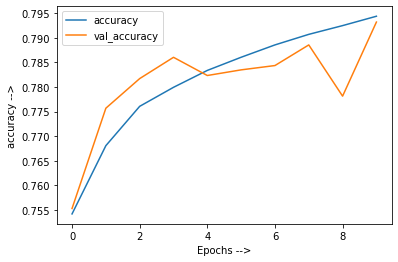

In [65]:
get_plot(history, metric="accuracy")

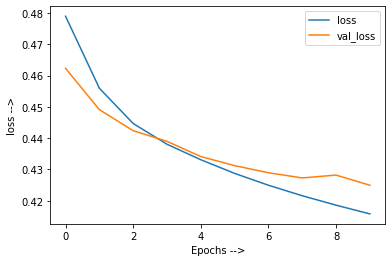

In [66]:
get_plot(history, metric="loss")

In [68]:
sample_text = (
    "The movie sucks. The animation and the graphics were terrible. I would never recommend this movie."
)
model.predict([sample_text])

array([[-2.5207765]], dtype=float32)

In [69]:
def getscore_and_sentiment(model, sample_text):
  predictions = model.predict(np.array([sample_text]))
  score = predictions[0][0]

  if score > 0 :
    print(f"result: positive sentiment with score: {score}")
  else:
    print(f"result: negetive sentiment with score: {score}")

In [70]:
getscore_and_sentiment(model=model, sample_text=sample_text)

result: negetive sentiment with score: -2.5207765102386475


In [84]:
tweet=" very brilliant, superb, daring, fantastic, excited,nice, pleasant, terrible"
getscore_and_sentiment(model,tweet)

result: negetive sentiment with score: -1.6265156269073486


In [96]:
x_train.shape

(1200000,)

In [97]:
y_train.shape

(1200000,)

ValueError: ignored

## Below things are tried to convert my csv dataset into tensorflow data but couldn't work much

In [102]:
dataset_train = tf.data.Dataset.from_tensor_slices((train_data, tar))
dataset_train

ValueError: ignored

In [ ]:
dataset_train = tf.data.Dataset.zip((x_train_dataset,y_train_dataset))
dataset_train

<ZipDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
dataset_test = tf.data.Dataset.zip((x_test_dataset,y_test_dataset))
dataset_test

<ZipDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>